In [47]:
#載入執行程式所需套件
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(8,7)
data=pd.read_excel('nba2.xlsx')

In [48]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-09-30 10:29:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.253.123.139, 172.253.123.102, 172.253.123.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvg07u2ktqn0o8sul3opsmkreb93h2r0/1632997725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-09-30 10:29:12--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/hvg07u2ktqn0o8sul3opsmkreb93h2r0/1632997725000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.193.132, 2607:f8b0:400c:c03::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [49]:
data.head()

,DATASET,R/P,DATE,TEAMS,H/R,W/E,W/L,DIFF,1Q,2Q,3Q,4Q,F,MIN,FG,FGA,3P,3PA,FT,FTA,OR,ORR,DRR,FT%,TOV%,EFG%,DRB%,ORB%,DR,TOT,A,PF,ST,TO,BL,PTS,POSS,PACE,OEFF,DEFF,REST DAYS,OPENING ODDS,SPREAD
0,2016-2017 Regular Season,1,10/25/2016,New York,2,1,0,-29,18,27,19,24,88,240,32,87,9,27,15,20,13,11,40,0.172414,0.158172,0.419540,0.725000,0.245283,29,42,17,22,6,18,6,88,100.4,100.4,87.7,116.6,3,205.5,9.5
1,2016-2017 Regular Season,1,10/25/2016,Cleveland,1,1,1,29,28,20,34,35,117,240,45,94,13,35,14,19,11,13,29,0.148936,0.120316,0.547872,0.754717,0.275000,40,51,31,22,12,14,5,117,100.4,100.4,116.6,87.7,3,-9.5,-9.5
2,2016-2017 Regular Season,1,10/25/2016,Utah,2,2,0,-9,26,20,37,21,104,240,40,82,8,24,16,16,6,5,29,0.195122,0.109956,0.536585,0.833333,0.171429,25,31,19,19,9,11,5,104,92.5,92.5,112.4,122.1,3,194.0,6.0
3,2016-2017 Regular Season,1,10/25/2016,Portland,1,2,1,9,26,28,23,36,113,240,39,75,13,19,22,22,5,6,25,0.293333,0.124121,0.606667,0.828571,0.166667,29,34,22,18,5,12,3,113,92.5,92.5,122.1,112.4,3,-6.0,-6.0
4,2016-2017 Regular Season,1,10/25/2016,San Antonio,2,2,1,29,31,33,33,32,129,240,47,98,12,24,23,26,21,8,27,0.234694,0.106174,0.540816,0.809524,0.437500,34,55,25,19,13,13,3,129,98.8,98.8,130.6,101.2,3,210.5,8.0


#第一題

In [50]:
data.describe()[['PTS','3P','TOT']]

,PTS,3P,TOT
count,2460.000000,2460.000000,2460.000000
mean,105.590244,9.653659,43.510569
std,12.148481,3.495010,6.381485
min,64.000000,1.000000,25.000000
25%,97.000000,7.000000,39.000000
50%,106.000000,9.000000,43.000000
75%,114.000000,12.000000,48.000000
max,149.000000,25.000000,67.000000


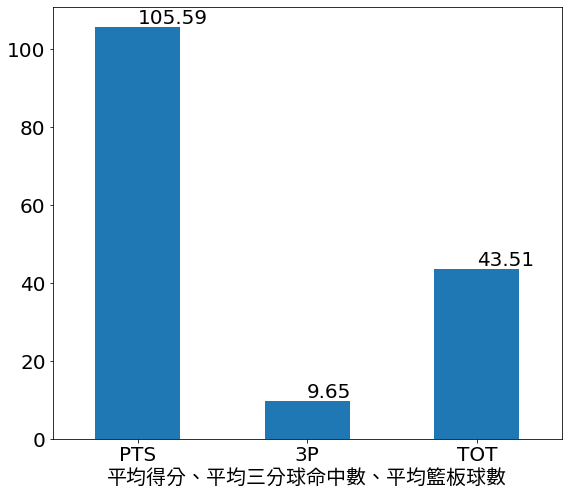

In [51]:
data.describe()[['PTS','3P','TOT']].iloc[1].plot.bar(rot=0,fontsize=20)
menMeans = data.describe()[['PTS','3P','TOT']].iloc[1].round(2)
plt.xlabel('平均得分、平均三分球命中數、平均籃板球數',fontproperties=myfont,fontsize=20)
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

#由上述程式碼可得知
> 在NBA2016-2017賽季，平均每場得分約為105.6分

> 平均每場有9.6顆三分球投進(9~10顆)

> 平均每場有43.5顆籃板球投進(43~44顆)

#第二題

In [52]:
data=pd.read_excel('nba2.xlsx')
data.groupby("H/R").mean()[['W/L','PTS','3P','TOT']]

,W/L,PTS,3P,TOT
H/R,,,,
1,0.58374,107.165041,9.898374,44.083740
2,0.41626,104.015447,9.408943,42.937398


#由上述程式碼可看出
1:主場 2:客場

在主場時的勝率相較客場較高(贏的機率大)

在主場時的平均得分相較客場較多(多了3%)

在主場及客場投進的三分球差不多(投進機率相差不到1%)

在主場時的籃板球相較客場多了一點點(進球率多了1.1%)

在四項資料中，在主場的得分機率皆高於客場，且主場勝率較高。可得知在主場打球較客場好